In [2]:
import numpy as np 
import matplotlib.pyplot as plt 
%matplotlib inline 
from scipy import stats
from scipy.stats.stats import pearsonr
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from MUA_helper import (make_NP_array_from_linear_data, cleanAxes, placeAxesOnGrid,filter_detect,butter_bandpass,
                        butter_bandpass_filter,basic_peak_detector,get_prepare_PSTHs,plot_save,plot_save_single)

from scipy import stats
import pickle 
import pandas as pd
import scipy.io as sio
import os

In [4]:
## POM

roi_folder = r"F:\SNA-029958\processed"
probe = 2

rois_lower =sio.loadmat(os.path.join(roi_folder,'borders_lower_{}.mat'.format(probe)))['borders_lower']
rois_upper =sio.loadmat(os.path.join(roi_folder,'borders_upper_{}.mat'.format(probe)))['borders_upper']
rois_names =sio.loadmat(os.path.join(roi_folder,'borders_names_{}.mat'.format(probe)))['borders_names']

borders_lower = rois_lower.flatten().astype(int) -rois_lower.flatten().astype(int)[-1]
borders_upper = rois_upper.flatten().astype(int) -rois_upper.flatten().astype(int)[-1]

names = []
for i in range(borders_lower.size):
    names.append(rois_names[i][0][0])


border = int(376-borders_lower[10]/-10)
border2 = int(376-borders_lower[15]/-10)

structure='PoM'
exp_name = '20190809_probe2'
stim_name = '001_stimData_probe2.pkl'
metaData = '001_2019-08-09_11-30-04_sweepParameter'
working_dir = r"D:\Work\Recordings\DATA\Neuropixel\190809\2019-08-09_11-30-32"
stim_data_path =os.path.join(working_dir,'NationalInstruments',stim_name)
metaData_path =os.path.join(working_dir,'NationalInstruments',metaData)
color = 'lightblue'
border_regions = ['CORTEX','HIPP0CAMPUS','THALAMUS']

binsize = 0.250
samplingrate = 30000
sweeplength = 20 
ch_bin = 1
pre = 9
chs = 384
trials = 20
thresh = -4
duration = 2 
baselines = []
stimuli = []

baselinestart = 7
baselineend = 9
stimulusstart = 9
stimulusend = 11

save = True

areas_PoM =np.array([[4,14],[14,41],[41,54],[54,70],[70,96]])
areas = areas_PoM


colors = plt.cm.coolwarm(np.linspace(0,1,11))

selection_PoM = [1,10,19,30,40,50,60,70,80,90]
selection = selection_PoM

selection = np.arange(96)

In [71]:
data_corrected_list = []

with open(stim_data_path, 'rb') as f:
    x = pickle.load(f)   
try:
    timestamps = x["Stimstart"].values
except:
    timestamps = x['Timestamps'].dropna().values[::2]
    
    
for i in range(len(timestamps))[:]:
    
    color = colors[i]
    folder = 'timestamps_{}'.format(i)
    folder_path  = working_dir + '/MUA-Analysis/' + exp_name + '/'+str(thresh) + '/timestamps_{}/'.format(i)
    stimulus = '{}_feedback'.format(i)

    files = os.listdir(folder_path)
    files = files[2:]
    #with open(stim_data_path, 'rb') as f:
    #   x = pickle.load(f)

    #feedback = x["Feedback"][stimulus]

    all_trials = {}
    for ch in range(chs):
        all_trials[str(ch)]= np.array([])
    print('dict created....')
    for trial in range(len(files)):
        test0 = np.load(os.path.join(folder_path,files[trial]))
        for ch in range(test0.shape[0]):
            all_trials[str(ch)] = np.sort(np.hstack((all_trials[str(ch)],test0[ch])))

    print('dict filled....')


    binwindow = binsize*samplingrate
    data = np.zeros([chs,int(sweeplength/binsize)-1])   
    bins = np.arange(0,sweeplength*samplingrate,binwindow)
    data_df = pd.DataFrame([])

    for x in range(chs):

        values,edges = np.histogram(all_trials[str(x)],bins)
        data[x,:] = values

    data_shape = np.reshape(data, (ch_bin,-1),order='F')
    data_db = np.mean(data_shape,axis =0)
    data_new = np.reshape(data_db,(int(chs/ch_bin),-1),order='F')
    
    
    for t in range(int(chs/ch_bin)):
        data_df[str(t)] = data_new[t,:]
    
    baseline_df = data_df.iloc[int(baselinestart/binsize):int(baselineend/binsize)]
    baseline_stats = baseline_df.describe().T
    baseline_stats['var'] = baseline_df.var()
    data_corrected = pd.DataFrame([])
    baselines.append(baseline_stats)
    

    stimulus_df = data_df.iloc[int(stimulusstart/binsize):int(stimulusend/binsize)]
    stimulus_stats = stimulus_df.describe().T
    stimuli.append(stimulus_stats)

    for ii in range(int(chs/ch_bin)):

        data_corrected[str(ii)] = (data_df[str(ii)] - baseline_stats['mean'].iloc[ii])/baseline_stats['std'].iloc[ii]
    data_corrected_list.append(data_corrected)


dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....
dict created....
dict filled....


In [73]:
Po_start = int(borders_lower[-4]*-0.1)

In [74]:
def plot_s(s):
    f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(7,3))

    ax1.plot(s)
    ax1.set_xlabel('i')
    ax1.set_ylabel('sigma_i')
    ax1.set_title('singular values')

    # get variance
    variance_list = []
    for i in range(len(s)):
        variance_list.append(s[i]**2/np.sum(s**2))
    
    ax2.plot(variance_list, 'o-')
    ax2.set_xlabel('principal component')
    ax2.set_ylabel('% variance')
    ax2.set_title('% variance')
    
    ax3.plot(variance_list[:10], 'o-')
    ax3.set_xlabel('principal component')
    ax3.set_ylabel('% variance')
    ax3.set_title('% var for first 3 PC')

PCA results for amp id 0
PCA results for amp id 1
PCA results for amp id 2
PCA results for amp id 3
PCA results for amp id 4
PCA results for amp id 5
PCA results for amp id 6
PCA results for amp id 7
PCA results for amp id 8
PCA results for amp id 9
PCA results for amp id 10


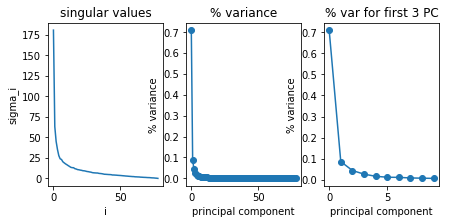

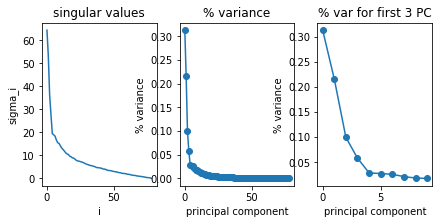

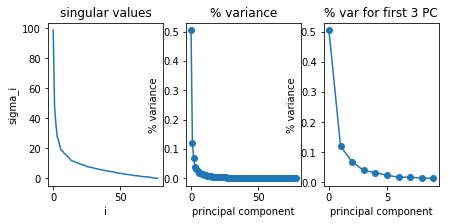

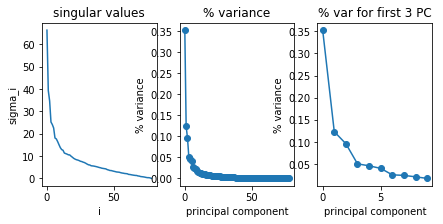

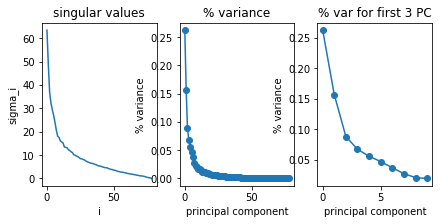

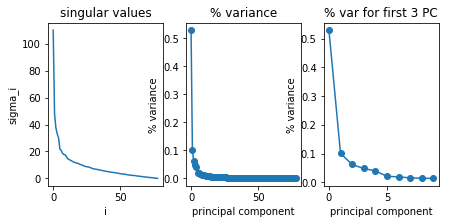

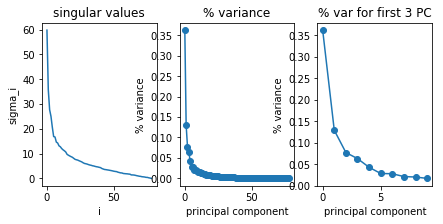

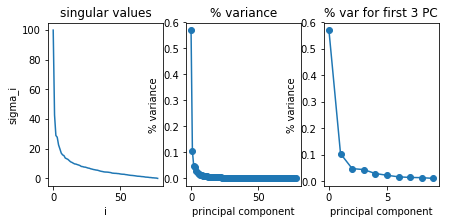

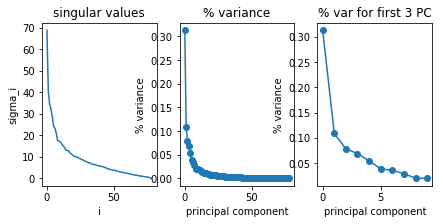

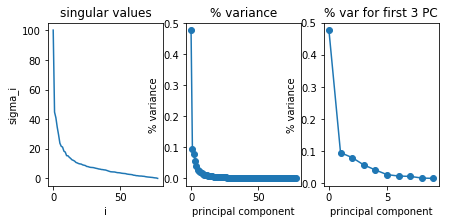

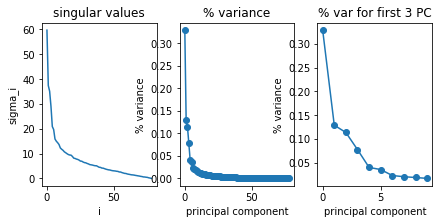

In [75]:
for i in range(len(data_corrected_list)):
    # SVD the data matrix 
    data_tmp = data_corrected_list[i].T
    data_tmp = data_tmp[data_tmp.index.values.astype(int) < Po_start]
    u, s, vh = np.linalg.svd(data_tmp, full_matrices=False)
    print('PCA results for amp id {}'.format(i))
    plot_s(s)

PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0
PCA results for amp id 0


C:\Users\tobiasleva\Anaconda3\lib\site-packages\matplotlib\pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


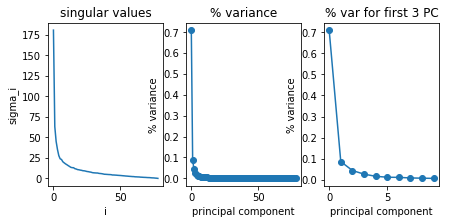

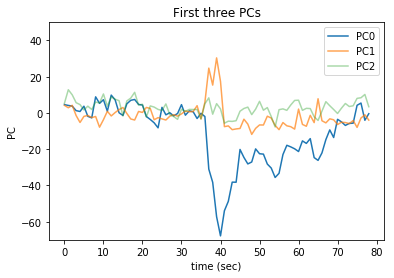

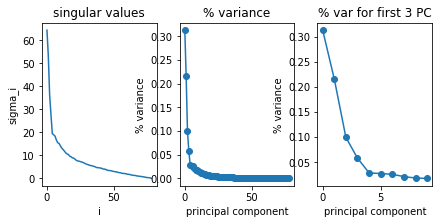

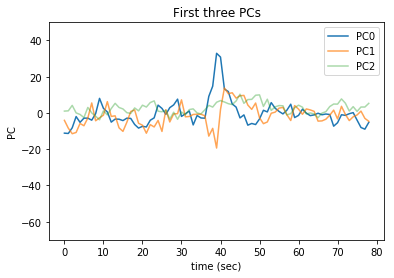

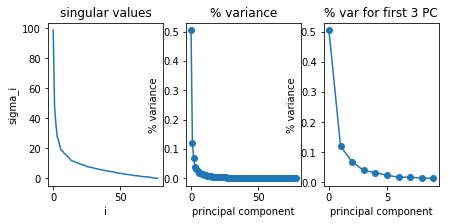

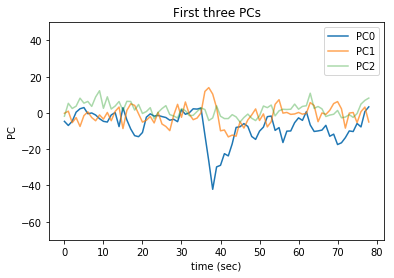

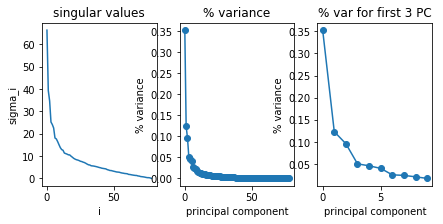

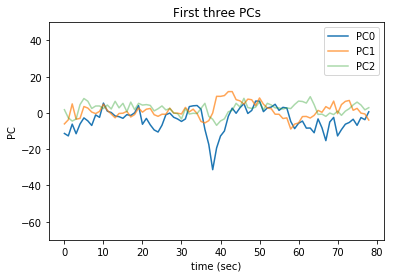

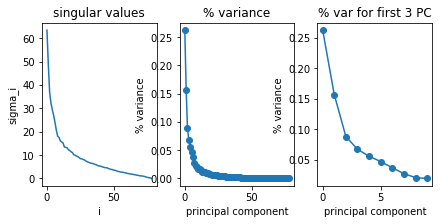

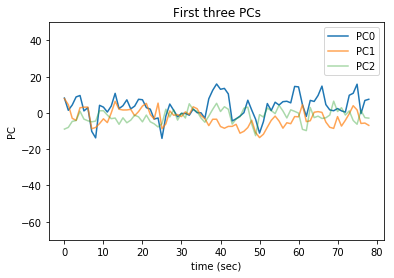

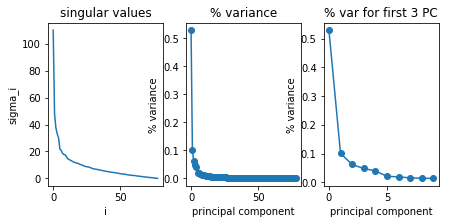

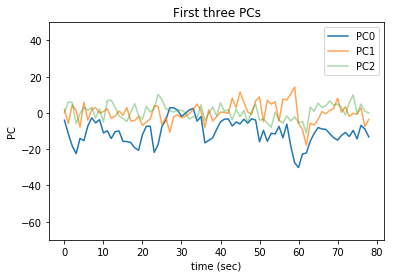

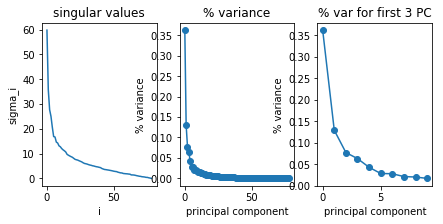

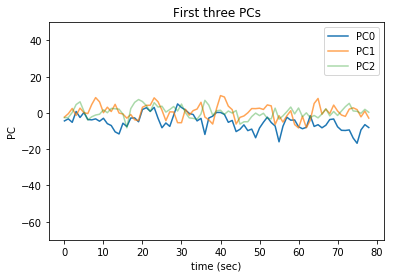

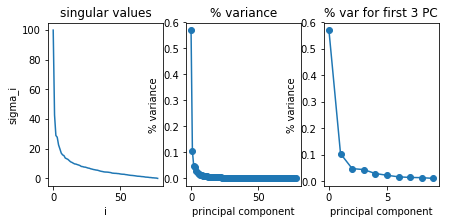

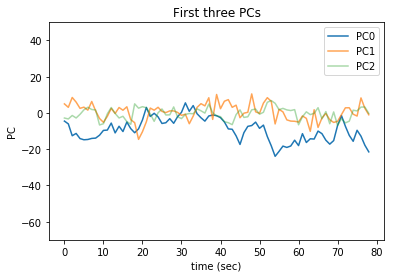

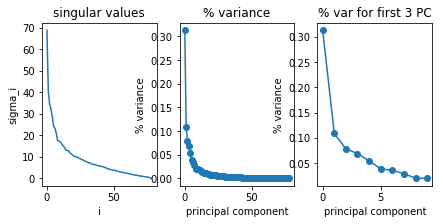

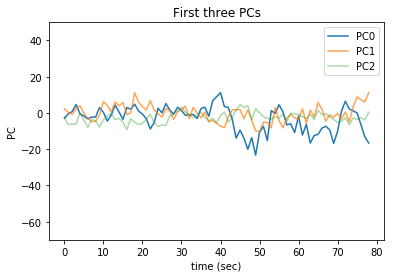

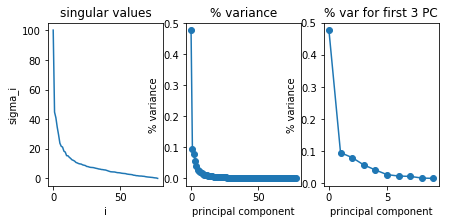

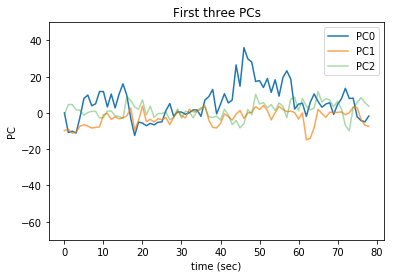

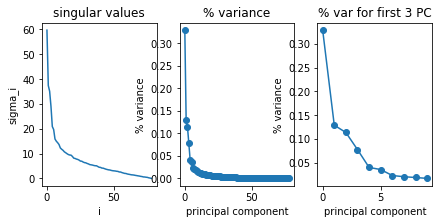

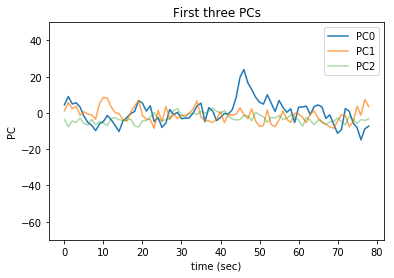

In [79]:
for i in range(len(data_corrected_list)):
    data_tmp = data_corrected_list[i].T
    data_tmp = data_tmp[data_tmp.index.values.astype(int) < Po_start]
    u, s, vh = np.linalg.svd(data_tmp, full_matrices=False)
    print('PCA results for amp id {}'.format(0))
    plot_s(s)
    PC3 = np.zeros((3, data_tmp.shape[1]))
    for x in range(3):
        PC3[x,:] = vh[x,:]*s[x]
        
    time = np.arange(0,data_tmp.shape[1])

    plt.figure()
    for i in range(3):
        plt.plot(time, PC3[i, :], alpha=1.0-0.3*i, label='PC'+str(i))
    plt.legend()
    plt.xlabel('time (sec)')
    plt.ylabel('PC')
    plt.title('First three PCs')
    plt.ylim(-70,50)

Text(0.5,1,'First three PCs')

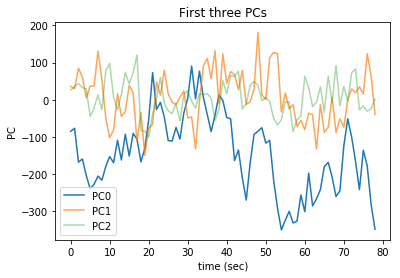

In [138]:
time = np.arange(0,81,1/30)

In [139]:
len(time)

2430

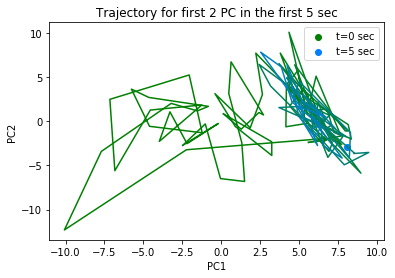

In [130]:
t_start = 0
t_end = 150

x = PC3[0,t_start:t_end]
y = PC3[1,t_start:t_end]
n = len(x)

# Your colouring array
T=np.linspace(0,1,np.size(x))**2
fig = plt.figure()
ax = fig.add_subplot(111)

# Segement plot and colour depending on T
s = 10 # Segment length
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1],y[i:i+s+1],color=(0.0,0.5,T[i]))
ax.scatter(x[0], y[0], label='t=0 sec', color=(0.0,0.5,T[0]))
ax.scatter(x[-1], y[-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
plt.title('Trajectory for first 2 PC in the first 5 sec')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()

Text(0.5,0.92,'Trajectory for first 3 PC in the first 5 sec')

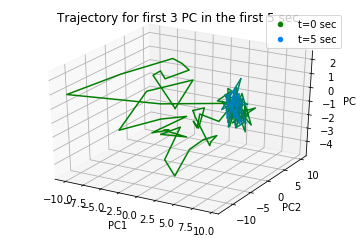

In [134]:
t_start = 0
t_end = 150 
fig = plt.figure()
ax = fig.gca(projection='3d')

x = PC3[0,t_start:t_end]
T=np.linspace(0,1,np.size(x))**2
s = 10 # Segment length
for i in range(0,n-s,s):
    ax.plot(PC3[0,i:i+s+1], PC3[1,i:i+s+1], PC3[2,i:i+s+1], color=(0.0,0.5,T[i]))
ax.scatter(PC3[0,t_start], PC3[1,t_start], PC3[2,t_start], label='t=0 sec', color=(0.0,0.5,T[0]))
ax.scatter(PC3[0,t_end-t_start-1], PC3[1,t_end-t_start-1], PC3[2,t_end-t_start-1], label='t=5 sec', color=(0.0,0.5,T[-1]))
plt.legend()

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Trajectory for first 3 PC in the first 5 sec')

In [94]:
for i in range(3):
    cov = pearsonr(run_zed, PC3[i,:])[0]
    print('PC'+str(i)+': '+str(cov))

PC0: -0.3427161317559347
PC1: 0.27136326267553856
PC2: 0.17318044057513313
